# Case Study on ANOVA
    XYZ Company has offices in four different zones. The company wishes to investigate the following :
    ● The mean sales generated by each zone.
    ● Total sales generated by all the zones for each month.
    ● Check whether all the zones generate the same amount of sales.
    Help the company to carry out their study with the help of data provided.

In [26]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import scipy
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

In [5]:
df=pd.read_csv('Sales_data_zone_wise.csv')

In [6]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [7]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


# 1. The mean sales generated by each zone.

In [9]:
df1=df.drop(columns=['Month'])

In [10]:
df1.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [11]:
df2=df1.mean()

In [12]:
print('Mean sales for each zone=\n\n',round(df2,3))

Mean sales for each zone=

 Zone - A    1540493.138
Zone - B    1755559.586
Zone - C    1772871.034
Zone - D    1842926.759
dtype: float64


# 2.  Total sales generated by all the zones for each month.

In [13]:
df3=df.sum(axis=1)
df_col = pd.concat([df.Month,df3], axis=1)
dfcol = df_col.rename({0: 'Total sales'}, axis='columns') 

In [14]:
print("The sum of sales for each month is:")
dfcol

The sum of sales for each month is:


,Month,Total sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


Text(0, 0.5, 'Total sales')

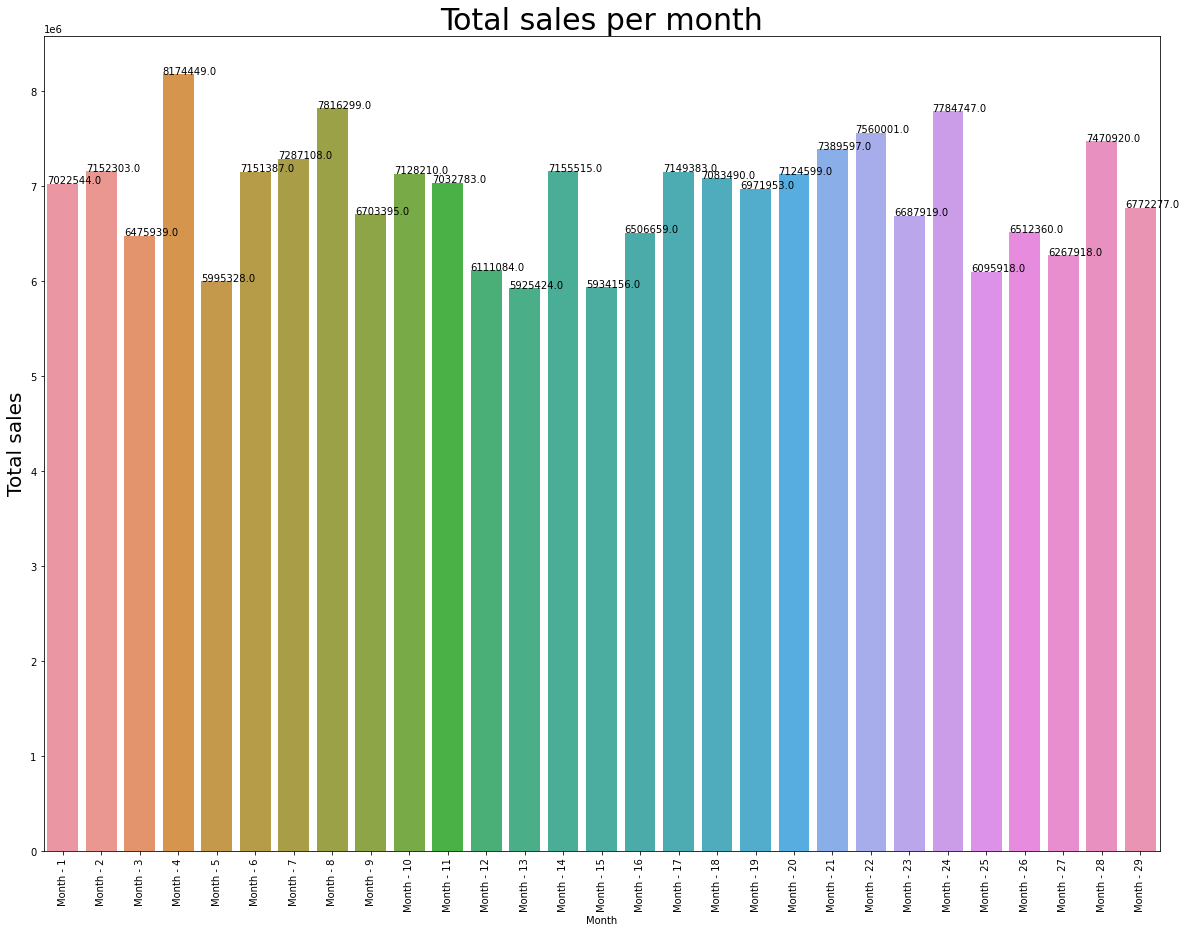

In [16]:
#plotting graph for better understanding

plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
graph=sns.barplot(x='Month',y='Total sales',data=dfcol)
plt.title('Total sales per month',size=30)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.3))
plt.ylabel("Total sales",fontsize=20)

# 3. Check whether all the zones generate the same amount of sales.

# Implementing one way ANOVA  

*  **Ho**:all the zones generate the same amount of sales
*  **Ha**:all the zones generate different amount of sales
*  $\alpha $: 0.05

In [17]:
a=df['Zone - A']
b=df['Zone - B']
c=df['Zone - C']
d=df['Zone - D']
fvalue, pvalue = f_oneway(a, b, c,d)
fvalue

5.672056106843581

In [18]:
pvalue

0.0011827601694503335

In [19]:
df_melt = pd.melt(df.reset_index(), id_vars=['Month'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
df_melt.columns = ['Month', 'Zone', 'Profit']
df_melt.head()


,Month,Zone,Profit
0,Month - 1,Zone - A,1483525
1,Month - 2,Zone - A,1238428
2,Month - 3,Zone - A,1860771
3,Month - 4,Zone - A,1871571
4,Month - 5,Zone - A,1244922


In [24]:
# Ordinary Least Squares (OLS) model
model = ols('Profit~C(Zone)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Zone),1.483058e+12,3.0,5.672056,0.001183
Residual,9.761449e+12,112.0,NaN,NaN


# Insight
## The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we reject the null hypothesis and conclude that all the zones generate different amount of sales


# Multiple pairwise comparisons (Post-hoc test)

## To know the pairs of significant different zones , perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey’s HSD test.

In [28]:
res = stat()
res.tukey_hsd(df=df_melt, res_var='Profit', xfac_var='Zone', anova_model='Profit~C(Month)+C(Zone)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Zone - A,Zone - B,215066.448276,11889.658701,418243.237851,3.924042,0.033783
1,Zone - A,Zone - C,232377.896552,29201.106977,435554.686127,4.239902,0.018406
2,Zone - A,Zone - D,302433.620690,99256.831115,505610.410265,5.518119,0.001085
3,Zone - B,Zone - C,17311.448276,-185865.341299,220488.237851,0.315860,0.900000
4,Zone - B,Zone - D,87367.172414,-115809.617161,290543.961989,1.594077,0.654262
5,Zone - C,Zone - D,70055.724138,-133121.065437,273232.513713,1.278217,0.778515
